In [202]:
import random
from typing import List
import matplotlib.pyplot as plt
import numpy as np

# Channel params
TAO = 5
MESSAGES = 100
P_reverse = 0
P_arr = np.arange(0, 0.99, 0.05)

times = []


# Стратегия для работы с буфером и ыводм сообщений на верхний уровень
def make_sequence(success, queue):
    if not success:
        return queue, []

    min_seq_num = min(success)
    max_success_num = max(success)

    for num in queue:
        if num > max_success_num + 1:
            break
        success.append(num)

    queue = [num for num in queue if num not in success]
    success.sort()

    return success, queue


for p in P_arr:

    # Init channel
    t = 1
    virtual_channels = TAO + 1

    queues = [[] for _ in range(virtual_channels)]
    tmp_virtual_channel = np.arange(virtual_channels)
    messges_for_send = list(range(1, MESSAGES+1))

    # Сообщения, которые вышли из системы успешно
    success_messages = []

    # Modulation of channel
    while True:

        sended_messages = list(range(virtual_channels))

        # Send message from every virtual channel
        for channel in range(virtual_channels):
            # В нужный тик отработка отправки сообщения в каждом виртальном канале
            if channel % t == 0:
                # Момент времени для отправки сообщения в i-ом канале
                tmp_virtual_channel[channel] = t
                # Добавим во временный список индекс сообщения, которе отправлется на данный момент
                sended_messages[channel] = messges_for_send[channel]


        # Recive message from every virtual channel
        for channel in range(virtual_channels):
            # В нужный тик выполнение функционала ресивера для каждого виртуального канала
            if (channel % t == 0) and (t > tmp_virtual_channel[channel]) == 0:
                # Доставка сообщения с вероятностью P
                if random.random() > p:
                    # Здесь можно орбработать модель для P_обр. != 0
                    if random.random() > P_reverse:
                        # Попытка удалить сообщение из списка сообщений на отправку
                        if sended_messages[channel] in messges_for_send:
                            messges_for_send.remove(sended_messages[channel])
                            # Добавление сообщения в буфер канала
                            queues[channel].append(sended_messages[channel])
                        else:
                            raise RuntimeError("Channel error")
                    else:
                        # Событие ошибки в обратном канале (квитацния сломалась)
                        pass
                else:
                    # Событие ошибки в канале (отрицательная квитанция)
                    pass
                
                success_messages, queues[channel] = make_sequence(success_messages, queues[channel])
                success_messages = list(set(success_messages))

        # Вывод буферо

        # print(messges_for_send)
        t += 1

        if (len(messges_for_send) == 0) and (queues):
            break

    # print(f'Buffers {t}:', *queues, sep='\n')
    # print(success_messages)

    print(f"===============")
    print(f"TOTAL TIME: {t}")

    times.append(t)


TOTAL TIME: 91
TOTAL TIME: 96
TOTAL TIME: 98
TOTAL TIME: 106
TOTAL TIME: 109
TOTAL TIME: 124
TOTAL TIME: 139
TOTAL TIME: 155
TOTAL TIME: 172
TOTAL TIME: 175
TOTAL TIME: 176
TOTAL TIME: 225
TOTAL TIME: 218
TOTAL TIME: 288
TOTAL TIME: 302
TOTAL TIME: 412
TOTAL TIME: 503
TOTAL TIME: 742
TOTAL TIME: 970
TOTAL TIME: 2005


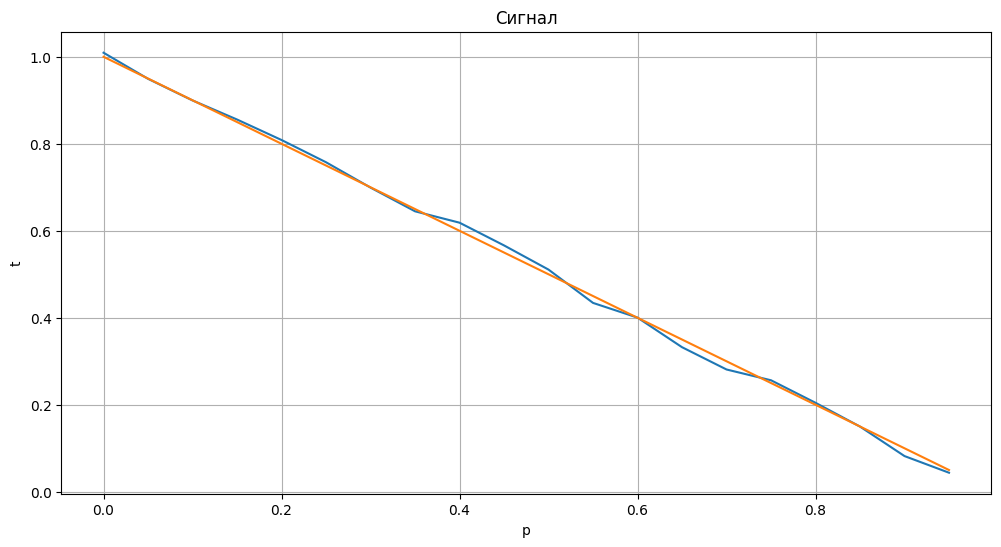

In [211]:
import numpy as np

rr = 0.02 * np.random.uniform(-1, 1, size=20)

plt.figure(figsize=(12, 6))
plt.plot(P_arr, (1 - P_arr + rr ))
plt.plot(P_arr, 1 - P_arr)
plt.title('Сигнал')
plt.xlabel('p')
plt.ylabel('t')
plt.grid(True)

plt.show()